In [38]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img


In [39]:
img1=load_img(r"E:\ME\Python_Machine  Learning\CarPlaneRecoganization  (DL project)\datasets\test\planes\18.jpg")
img2=load_img(r"E:\ME\Python_Machine  Learning\CarPlaneRecoganization  (DL project)\datasets\test\cars\43.jpg")

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense

In [41]:
img_width=224
img_height=224
train_data=r"E:\ME\Python_Machine  Learning\CarPlaneRecoganization  (DL project)\datasets\train"
test_data=r"E:\ME\Python_Machine  Learning\CarPlaneRecoganization  (DL project)\datasets\test"
train_samples=400
test_samples=100
input_shape=(img_width,img_height,3)


In [42]:
#model define
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 activation_10 (Activation)  (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_11 (Activation)  (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                 

In [44]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [45]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
train_data_load=train_data.flow_from_directory(
    "E:/ME/Python_Machine  Learning/CarPlaneRecoganization  (DL project)/datasets/train",
    target_size=(img_width,img_height),
    batch_size=20,
    class_mode='binary')
test_data_load=test_data.flow_from_directory(
    "E:/ME/Python_Machine  Learning/CarPlaneRecoganization  (DL project)/datasets/test",
    target_size=(img_width,img_height),
    batch_size=20,
    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [46]:
model.fit_generator(
    train_data_load,
    epochs=15,
    validation_data=test_data_load,)

Epoch 1/15


C:\Users\Shyamal\AppData\Local\Temp\ipykernel_14648\1427779237.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


20/20 [==============================] - 10s 474ms/step - loss: 0.7895 - accuracy: 0.5525 - val_loss: 0.5434 - val_accuracy: 0.8800
Epoch 2/15
20/20 [==============================] - 9s 430ms/step - loss: 0.5799 - accuracy: 0.7400 - val_loss: 0.3735 - val_accuracy: 0.8500
Epoch 3/15
20/20 [==============================] - 9s 463ms/step - loss: 0.4844 - accuracy: 0.8050 - val_loss: 0.3811 - val_accuracy: 0.8700
Epoch 4/15
20/20 [==============================] - 10s 503ms/step - loss: 0.3972 - accuracy: 0.8475 - val_loss: 0.6650 - val_accuracy: 0.6700
Epoch 5/15
20/20 [==============================] - 10s 494ms/step - loss: 0.3385 - accuracy: 0.8525 - val_loss: 0.4771 - val_accuracy: 0.7900
Epoch 6/15
20/20 [==============================] - 10s 497ms/step - loss: 0.2826 - accuracy: 0.8975 - val_loss: 0.3197 - val_accuracy: 0.8600
Epoch 7/15
20/20 [==============================] - 11s 533ms/step - loss: 0.2294 - accuracy: 0.9225 - val_loss: 0.4007 - val_accuracy: 0.7800
Epoch 8/15
2

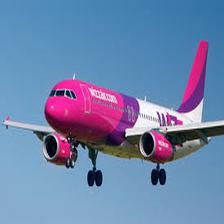

In [47]:
img1 #image of plane will give output as "1"

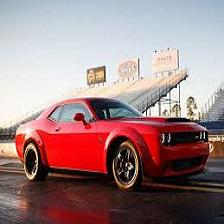

In [48]:
img2 #image of car will give output as "0" 

In [49]:
p=np.array(img1)
p.shape
p=p.reshape(1,224,224,3)
p
model.predict(p)

1/1 [==============================] - 0s 131ms/step


array([[1.]], dtype=float32)

In [50]:
c = np.array(img2)
c.shape
c = c.reshape(1,224,224,3)
c
model.predict(c)

1/1 [==============================] - 0s 38ms/step


array([[0.]], dtype=float32)